In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

df_full = pd.read_csv('data/ImgSpec_core/Full-spec.csv')
df_cr = pd.read_csv('data/ImgSpec_core/Cr.csv')
df_fe = pd.read_csv('data/ImgSpec_core/Fe.csv')
df_crfe = pd.read_csv('data/ImgSpec_core/Cr+Fe.csv')
df_o = pd.read_csv('data/ImgSpec_core/SiO.csv')
df_o.Y /= 3
df_cr_mit_o = pd.read_csv('data/ImgSpec_core/Cr+O.csv')
df_cr_ohne_o = pd.read_csv('data/ImgSpec_core/Cr-O.csv')
df_cr_ohne_o.Y = df_cr_ohne_o.Y  /df_cr_ohne_o.Y[12] * df_cr_mit_o.Y[12]

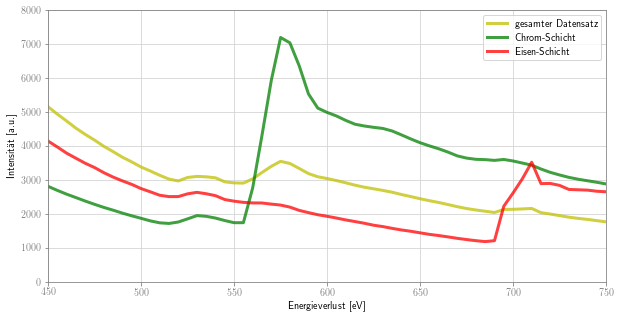

In [2]:
plt.figure(figsize=(10,5))
plt.plot(df_full.X, df_full.Y, linewidth=3, alpha=0.75, color='y', label='gesamter Datensatz')
plt.plot(df_cr.X, df_cr.Y, linewidth=3, alpha=0.75, color='g', label='Chrom-Schicht')
plt.plot(df_fe.X, df_fe.Y, linewidth=3, alpha=0.75, color='r', label='Eisen-Schicht')
#plt.plot(df_o.X, df_o.Y, linewidth=3, alpha=0.75, color='b', label='Siliziumoxid-Schicht')
plt.xlim(450, 750)
plt.xlabel('Energieverlust [eV]')
plt.ylim(0, 8000)
plt.ylabel('Intensität [a.u.]')
plt.legend(loc='best')
plt.savefig('Bilder/ImgSpec_core_Spectrum.pdf')
plt.show()

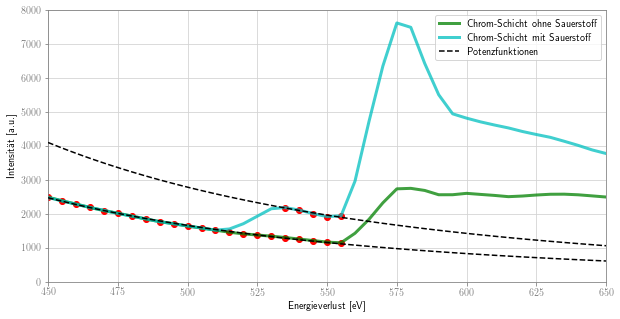

In [3]:
plt.figure(figsize=(10,5))
pow = lambda x, a, r: a * x **r
x_fit = np.linspace(450, 650, 100)

plt.scatter(df_cr_ohne_o.X[(df_cr_mit_o.X >= 450) &(df_cr_mit_o.X <= 555)],
            df_cr_ohne_o.Y[(df_cr_mit_o.X >= 450) &(df_cr_mit_o.X <= 555)],
            color='r', label=''
           )
plt.plot(df_cr_ohne_o.X, df_cr_ohne_o.Y,
         linewidth=3, alpha=0.75, color='g', label='Chrom-Schicht ohne Sauerstoff'
        )
popt, pcov = scipy.optimize.curve_fit(pow,
                                      df_cr_ohne_o.X[(df_cr_mit_o.X >= 450) &(df_cr_mit_o.X <= 555)],
                                      df_cr_ohne_o.Y[(df_cr_mit_o.X >= 450) &(df_cr_mit_o.X <= 555)],
                                      (1e5, -2)
                                     )
plt.plot(x_fit, pow(x_fit, *popt), c='k', ls='--', zorder=10)


plt.scatter(df_cr_mit_o.X[(df_cr_mit_o.X >= 535) &(df_cr_mit_o.X <= 555)],
            df_cr_mit_o.Y[(df_cr_mit_o.X >= 535) &(df_cr_mit_o.X <= 555)],
            color='r', label=''
           )
plt.plot(df_cr_mit_o.X, df_cr_mit_o.Y,
         linewidth=3, alpha=0.75, color='c', label='Chrom-Schicht mit Sauerstoff'
        )
popt, pcov = scipy.optimize.curve_fit(pow,
                                      df_cr_mit_o.X[(df_cr_mit_o.X >= 535) &(df_cr_mit_o.X <= 555)],
                                      df_cr_mit_o.Y[(df_cr_mit_o.X >= 535) &(df_cr_mit_o.X <= 555)],
                                      popt
                                     )
plt.plot(x_fit, pow(x_fit, *popt), c='k', ls='--', zorder=10, label='Potenzfunktionen')

plt.xlim(450, 650)
plt.xlabel('Energieverlust [eV]')
plt.ylim(0, 8000)
plt.ylabel('Intensität [a.u.]')
plt.legend(loc='best')
plt.savefig('Bilder/ImgSpec_core_Spectrum_Cr.pdf')
plt.show()

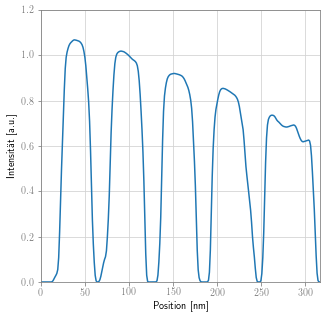

In [4]:
df_dicke = pd.read_csv('data/ImgSpec_core/Dicke_linescan.csv')

plt.figure(figsize=(5,5))
plt.plot(df_dicke.X, df_dicke.Y)
plt.xlim(df_dicke.X.min(), df_dicke.X.max())
plt.xlabel('Position [nm]')
plt.ylim(0, 1.2)
plt.ylabel('Intensität [a.u.]')
plt.savefig('Bilder/ImgSpec_core_Dicke_Plot.pdf')
plt.show()

In [5]:
df_full.head()

,X,Y
0,450,5156.816
1,455,4938.818
2,460,4736.616
3,465,4525.702
4,470,4343.417
